# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_csv/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['vaini',
 'atuona',
 'kodiak',
 'new waterford',
 'sisimiut',
 'tasiilaq',
 'ushuaia',
 'alfredo chaves',
 'cherskiy',
 'saint george',
 'punta arenas',
 'namibe',
 'yeppoon',
 'sao jose da coroa grande',
 'ribeira grande',
 'teneguiban',
 'qaanaaq',
 'faanui',
 'mayor pablo lagerenza',
 'tiksi',
 'mys shmidta',
 'bilma',
 'la ronge',
 'busselton',
 'schrobenhausen',
 'avarua',
 'nanortalik',
 'east london',
 'meulaboh',
 'vallenar',
 'san cristobal',
 'kazalinsk',
 'port elizabeth',
 'bolungarvik',
 'yerbogachen',
 'ahipara',
 'lazaro cardenas',
 'clyde river',
 'albany',
 'thompson',
 'carnarvon',
 'moron',
 'nome',
 'puerto ayora',
 'vardo',
 'lebu',
 'bredasdorp',
 'knysna',
 'sapozhok',
 'villazon',
 'butaritari',
 'tuktoyaktuk',
 'slave lake',
 'rocha',
 'rikitea',
 'rawlins',
 'kahului',
 'mataura',
 'belmonte',
 'jalu',
 'karasjok',
 'simpang',
 'aksu',
 'khatanga',
 'bardiyah',
 'lorengau',
 'sidi ali',
 'kunigal',
 'upernavik',
 'hobart',
 'qandala',
 'hilo',
 'yellowknife',

In [3]:
print(len(cities))

621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url - found on https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


#create lists
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set loop
i = 1
for city in cities:
    time.sleep(1)
    city=city
    query_url = url + "&q=" + city.replace(" ","+")
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"])
        
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City not found. Skipping.")

Processing record 1|vaini
Processing record 2|atuona
Processing record 3|kodiak
Processing record 4|new waterford
Processing record 5|sisimiut
Processing record 6|tasiilaq
Processing record 7|ushuaia
Processing record 8|alfredo chaves
Processing record 9|cherskiy
Processing record 10|saint george
Processing record 11|punta arenas
Processing record 12|namibe
Processing record 13|yeppoon
Processing record 14|sao jose da coroa grande
Processing record 15|ribeira grande
City not found. Skipping.
Processing record 16|qaanaaq
Processing record 17|faanui
Processing record 18|mayor pablo lagerenza
Processing record 19|tiksi
City not found. Skipping.
Processing record 20|bilma
Processing record 21|la ronge
Processing record 22|busselton
Processing record 23|schrobenhausen
Processing record 24|avarua
Processing record 25|nanortalik
Processing record 26|east london
Processing record 27|meulaboh
Processing record 28|vallenar
Processing record 29|san cristobal
City not found. Skipping.
Processing r

Processing record 246|sao filipe
Processing record 247|minudasht
Processing record 248|hobyo
Processing record 249|innisfail
Processing record 250|xuddur
Processing record 251|kapitanivka
Processing record 252|cabo san lucas
Processing record 253|novonikolayevskiy
Processing record 254|west bay
Processing record 255|tokur
Processing record 256|vestmanna
Processing record 257|georgetown
Processing record 258|saint albans
Processing record 259|bambous virieux
Processing record 260|coro
Processing record 261|port macquarie
Processing record 262|loubomo
Processing record 263|pedasi
Processing record 264|vilcun
Processing record 265|matay
Processing record 266|avera
Processing record 267|puerto penasco
Processing record 268|camacha
Processing record 269|solnechnyy
Processing record 270|victoria
Processing record 271|chara
Processing record 272|malartic
Processing record 273|bansko
Processing record 274|naze
Processing record 275|ancud
City not found. Skipping.
City not found. Skipping.
Proc

Processing record 485|mutis
Processing record 486|beyneu
Processing record 487|vaitape
Processing record 488|muzhi
Processing record 489|tilichiki
Processing record 490|moindou
Processing record 491|xinqing
Processing record 492|asau
Processing record 493|pacific grove
Processing record 494|valparaiso
Processing record 495|awjilah
Processing record 496|khandyga
Processing record 497|sydney mines
Processing record 498|maputo
Processing record 499|kalmunai
Processing record 500|raudeberg
Processing record 501|pshekhskaya
Processing record 502|kukushtan
Processing record 503|palma soriano
City not found. Skipping.
Processing record 504|kununurra
Processing record 505|yondo
Processing record 506|kerema
Processing record 507|maceio
Processing record 508|mutoko
Processing record 509|galesburg
Processing record 510|port-gentil
Processing record 511|grand gaube
Processing record 512|derventa
Processing record 513|esso
Processing record 514|nandi
Processing record 515|santiago del estero
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dataframe
weather_df = {
    "City":city_name,
    "Lat":lat,
    "Long":long,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,
}


#Display DF
weather_df =pd.DataFrame(weather_df)
weather_df



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,74.68,80,{'all': 13},8.72,TO,1633791738
1,Atuona,-9.8000,-139.0333,77.63,71,{'all': 17},18.03,PF,1633791652
2,Saint Paul Harbor,57.7900,-152.4072,42.22,83,{'all': 100},29.44,US,1633791677
3,New Waterford,40.8451,-80.6145,68.86,94,{'all': 100},1.99,US,1633791742
4,Sisimiut,66.9395,-53.6735,32.36,68,{'all': 100},8.79,GL,1633791743
...,...,...,...,...,...,...,...,...,...
558,Hokitika,-42.7167,170.9667,49.33,89,{'all': 69},3.33,NZ,1633792543
559,Ovalle,-30.5983,-71.2003,63.68,43,{'all': 0},6.35,CL,1633792545
560,Big Spring,32.2504,-101.4787,77.27,48,{'all': 1},11.01,US,1633792543
561,Lavrentiya,65.5833,-171.0000,29.97,83,{'all': 89},11.32,RU,1633792547


In [6]:
#Clean Cloudiness column
clean_cloudiness_list=[]

for cloudiness in list(weather_df["Cloudiness"].values):
    clean_cloudiness_list.append(int(dict(cloudiness)["all"]))
    
weather_df["Cloudiness"]=clean_cloudiness_list
weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,74.68,80,13,8.72,TO,1633791738
1,Atuona,-9.8000,-139.0333,77.63,71,17,18.03,PF,1633791652
2,Saint Paul Harbor,57.7900,-152.4072,42.22,83,100,29.44,US,1633791677
3,New Waterford,40.8451,-80.6145,68.86,94,100,1.99,US,1633791742
4,Sisimiut,66.9395,-53.6735,32.36,68,100,8.79,GL,1633791743
...,...,...,...,...,...,...,...,...,...
558,Hokitika,-42.7167,170.9667,49.33,89,69,3.33,NZ,1633792543
559,Ovalle,-30.5983,-71.2003,63.68,43,0,6.35,CL,1633792545
560,Big Spring,32.2504,-101.4787,77.27,48,1,11.01,US,1633792543
561,Lavrentiya,65.5833,-171.0000,29.97,83,89,11.32,RU,1633792547


In [7]:
weather_df= weather_df.rename_axis('City ID')

#Exporting data to csv
weather_df.to_csv("output_csv/city.csv")

In [8]:
#Display humidity *to look for anything above 100%
humidity

[80,
 71,
 83,
 94,
 68,
 69,
 79,
 91,
 100,
 95,
 47,
 64,
 83,
 62,
 73,
 94,
 72,
 26,
 85,
 10,
 63,
 79,
 51,
 100,
 76,
 64,
 84,
 30,
 43,
 59,
 96,
 67,
 83,
 76,
 78,
 100,
 66,
 57,
 70,
 81,
 97,
 72,
 50,
 65,
 59,
 20,
 71,
 90,
 41,
 56,
 80,
 88,
 88,
 98,
 76,
 16,
 99,
 82,
 33,
 96,
 51,
 77,
 50,
 89,
 52,
 70,
 74,
 91,
 100,
 77,
 65,
 75,
 87,
 81,
 55,
 87,
 98,
 79,
 87,
 90,
 85,
 61,
 94,
 81,
 71,
 82,
 80,
 78,
 92,
 88,
 82,
 65,
 58,
 100,
 61,
 78,
 89,
 98,
 76,
 57,
 79,
 10,
 67,
 88,
 80,
 64,
 96,
 57,
 64,
 32,
 86,
 67,
 70,
 78,
 31,
 88,
 91,
 85,
 91,
 60,
 69,
 62,
 74,
 76,
 54,
 100,
 80,
 73,
 56,
 73,
 15,
 83,
 89,
 86,
 95,
 40,
 79,
 79,
 51,
 96,
 96,
 83,
 77,
 90,
 53,
 72,
 16,
 12,
 93,
 98,
 88,
 92,
 73,
 85,
 94,
 90,
 83,
 42,
 67,
 44,
 85,
 94,
 70,
 33,
 84,
 17,
 25,
 65,
 7,
 75,
 51,
 80,
 69,
 72,
 80,
 88,
 58,
 17,
 78,
 82,
 75,
 83,
 47,
 54,
 72,
 82,
 73,
 13,
 78,
 85,
 74,
 90,
 53,
 26,
 19,
 32,
 80,
 77,
 90,


In [9]:
#Statement
print("After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data")


After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
#see above, there were none over 100%


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
##*although there was no data to clean you CAN see in the above DF that I had to clean the Cloudiness data, which demonstrates my ability to clean data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

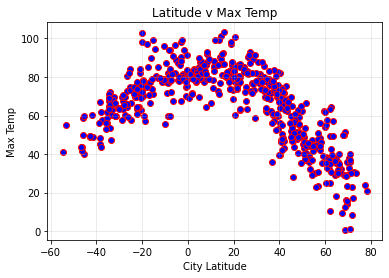

In [12]:
#Create Scatter plot for Latitude v Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "red")

#Title
plt.title ("Latitude v Max Temp")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Max Temp.png")
           
    

In [13]:
#Observation: the closer to the Equator, the larger the max temp.

In [14]:
#Print Correlation
print(f'the closer to the Equator, the larger the max temp.')

the closer to the Equator, the larger the max temp.


## Latitude vs. Humidity Plot

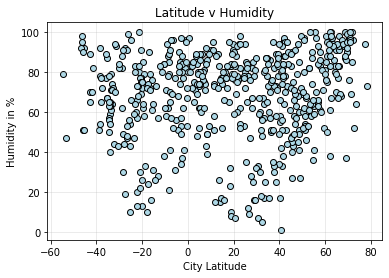

In [15]:
#Create Scatter plot for Latitude v Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "black")

#Title
plt.title ("Latitude v Humidity")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Humidity in %")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Humidity.png")

In [16]:
#Print Correlation
print(f'The city latitude does not affect level of humidity.')

The city latitude does not affect level of humidity.


## Latitude vs. Cloudiness Plot

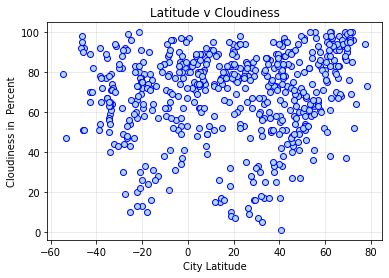

In [17]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "blue")
#Title
plt.title ("Latitude v Cloudiness")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness in  Percent")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Cloudiness.png")

In [18]:
#Print Correlation
print(f'There is a negative correlation betwee Cloudiness and Latitude.')

There is a negative correlation betwee Cloudiness and Latitude.


## Latitude vs. Wind Speed Plot

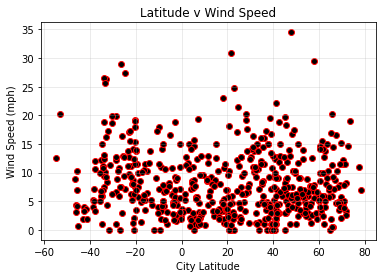

In [19]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "black", edgecolor = "red")
#Title
plt.title ("Latitude v Wind Speed")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Wind Speed.png")

In [20]:
#Print Correlation
print(f'There lower the Windpseed tend to maintain themselves regardless of Latitude.')

There lower the Windpseed tend to maintain themselves regardless of Latitude.


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
Southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [22]:
# Define function for creating linear agression and scatter plot
# Add the linear regression equation and line to plot
def linear_regression(x_values,y_values,eq_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    
    #Equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_coord[0],eq_coord[1]),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [23]:
###Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8496794311960042


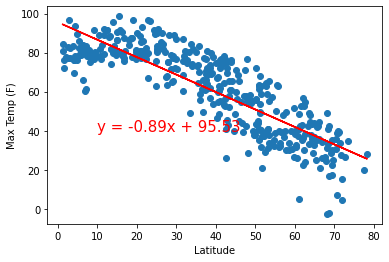

None


In [57]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]

#Label and diplay
plt.ylabel("Max Temp (F)")
print(linear_regression(x_values,y_values,[10,20]))

In [25]:
#Print Correlation
print(f'There is a negative correlation betwee Max Temp and Latitude. The higher the latitude, the lower the the Max T.')

There is a negative correlation betwee Max Temp and Latitude. The higher the latitude, the lower the the Max T.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7341995676688536


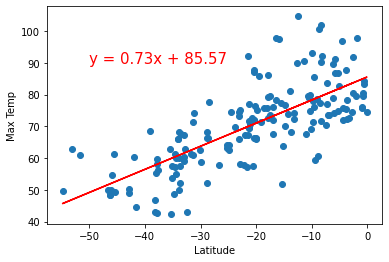

None


In [59]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]


#Label and diplay
plt.ylabel("Max Temp")
print(linear_regression(x_values,y_values,[-50,90]))



In [26]:
#Print Correlation
print(f'There is a positive correlation between Max T and and increase in Latitude,')

There is a positive correlation between Max T and and increase in Latitude,


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17274811572049054


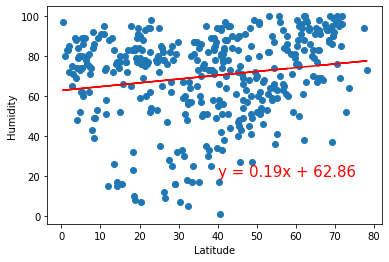

None


In [27]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]


#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values,[40,20]))


In [28]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.020006980172478216


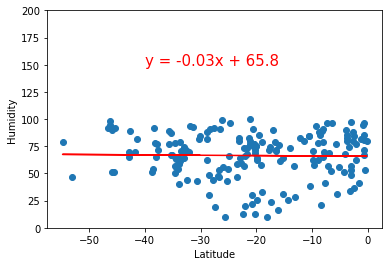

None


In [29]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")

#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values,[-40,150]))


In [30]:
#Print Correlation
print(f'There is a little if any correlation.')

There is a little if any correlation.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0408684435781103


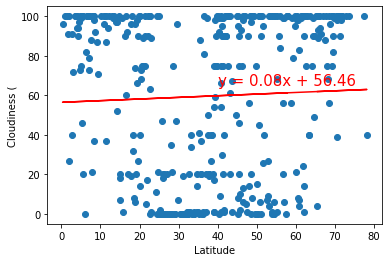

None


In [31]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]


#Label and diplay
plt.ylabel("Cloudiness (")
print(linear_regression(x_values,y_values,[40,65]))


In [32]:
#Print Correlation
print(f'There is a slight positive correlation.')

There is a slight positive correlation.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2862638932196187


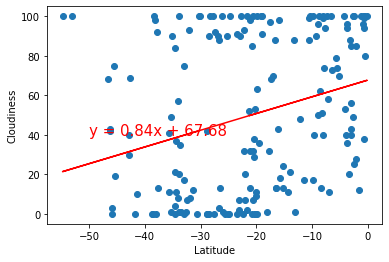

None


In [33]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]

#Label and diplay
plt.ylabel("Cloudiness")
print(linear_regression(x_values,y_values,[-50,40]))

In [34]:
#Print Correlation
print(f'There is a barely a positive correlation.')

There is a barely a positive correlation.


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05084151317992925


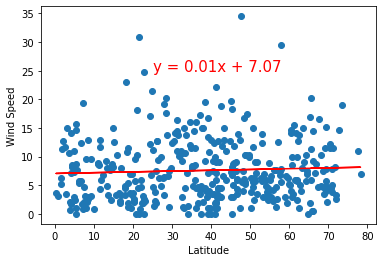

None


In [35]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values,[25,25]))

In [36]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1815630845211739


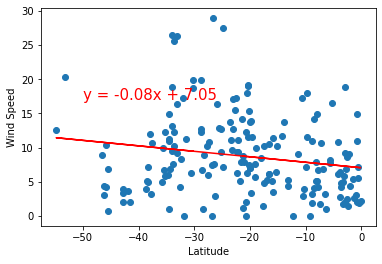

None


In [37]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values,[-50,17]))

In [38]:
#Print Correlation
print(f'There is a weak negative correlation.')

There is a weak negative correlation.


In [39]:
print(f'Observations are written above.')

Observations are written above.
